# Project: EDA For IMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Selected Dataset is IMDB

> The dataset is taken from the IMDB database. It contains data of 1000 most popular movies(by IMDB rating) for the period 2006-2016.
IMDB (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.

>Users registered on this site are invited to rate any film on a scale of 1 to 10, and the totals are converted into a weighted mean-rating that is displayed beside each title.
It also displays the Metascore of each title. Metascore is the rating given by another movie rating company called Metacritic. However, unlike IMDB, they get ratings from registered well known rating agencies and calculates a weighted average of those ratings.

>Below is the data dictionary explaining the various columns of the dataset
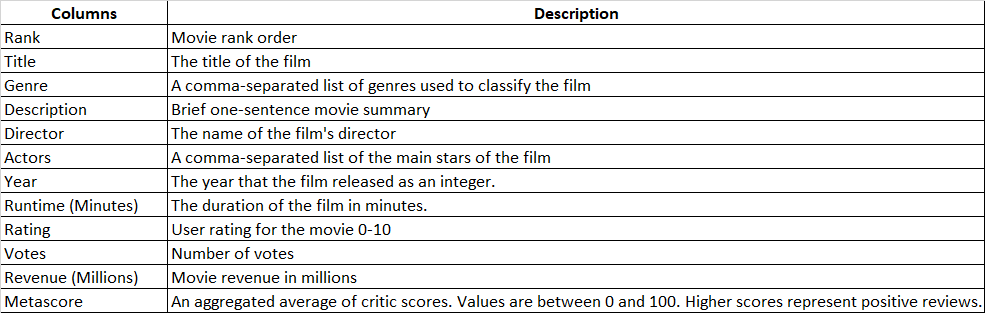

In [3]:
# Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


In [5]:
# Load data
df = pd.read_csv('tmdb-movies.csv')
# Print the Head of the data to take a look what is inside df
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# Print the tail of the data to take a look what is inside df
df.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


### General Properties

In [7]:
# we can see the data countain 10866 rows and 21 columns 
df.shape

(10866, 21)

In [9]:
# check the statistics summary of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# check the null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# Check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Check the duplicated 

In [13]:
# use the  Duplicated option to check the duplicated rows
sum(df.duplicated())

1

### IMDB Data Cleaning 

### Step 1: Convert 'release_date' to datetime from 'object' (string)

In [14]:
# using pandas to_datetime to transfer the data type
df['release_date']=pd.to_datetime(df['release_date'],format='%m/%d/%y')
pd.options.mode.chained_assignment = None
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

### Remove Duplicated rows

In [15]:
# dropping the duplicated and check it after dropping 
df.drop_duplicates(inplace = True)
sum(df.duplicated())


0

>we can see above the duplicated is Zero

### drop the unnessesary columns from the data

In [16]:
# use drop function to drop the unnessesary columns and  use inplace to make sure that the it will imapct on the data
df.drop(['imdb_id' , 'homepage' , 'overview' , 'tagline' , 'vote_count'] , axis=1 , inplace=True)

In [17]:
#here we will fill the NA values with the mean
df.fillna(df.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   keywords              9372 non-null   object        
 8   runtime               10865 non-null  int64         
 9   genres                10842 non-null  object        
 10  production_companies  9835 non-null   object        
 11  release_date          10865 non-null  datetime64[ns]
 12  vote_average          10865 non-null  float64       
 13  release_year    

In [18]:
# check the data to see it after removing the columns
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08


##### We can see that there is a lot of values in budget and revenue columns are 0, se we will replace it with the mean for each one 

In [19]:
# check how many values are Zero in budget 
budget_count_zeros = (df['budget'] == 0).value_counts()
budget_count_zeros

True     5696
False    5169
Name: budget, dtype: int64

In [20]:
# check how many values are Zero in revenue
revenue_count_zeros = (df['revenue'] == 0).value_counts()
revenue_count_zeros

True     6016
False    4849
Name: revenue, dtype: int64

In [22]:
#Find the mean of the budget to replace the zero values with it
budget_mean = df['budget'].mean()
budget_mean 

14624286.06433502

In [23]:
#Find the mean of the revenue to replace the zero values with it
revenue_mean = df['revenue'].mean()
revenue_mean

39826896.07685228

In [24]:
# Replace the zero values with the mean
df.loc[ df.budget == 0, "budget" ] = budget_mean

In [25]:
# Replace the zero values with the mean
df.loc[ df.revenue == 0, "revenue" ] = revenue_mean

In [26]:
#the tail will show us that the Zero values has been replaced with the mean
df.tail(10)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
10856,20277,0.140934,1.462429e+07,3.982690e+07,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,Norman Tokar,great dane|dachshund,93,Comedy|Drama|Family,Walt Disney Pictures,2066-02-16,5.7,1966,0.000000,0.0
10857,5921,0.131378,1.462429e+07,3.982690e+07,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,Henry Hathaway,repayment|revenge|native american|wild west|ha...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,2066-06-10,5.9,1966,0.000000,0.0
10858,31918,0.317824,1.462429e+07,3.982690e+07,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,Norman Jewison,cold war|russian|new england,126,Comedy|War,The Mirisch Corporation,2066-05-25,5.5,1966,0.000000,0.0
10859,20620,0.089072,1.462429e+07,3.982690e+07,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,John Frankenheimer,plastic surgery|suspense,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,2066-10-05,6.6,1966,0.000000,0.0
10860,5060,0.087034,1.462429e+07,3.982690e+07,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,monster|carry on|horror spoof,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,2066-05-20,7.0,1966,0.000000,0.0
10861,21,0.080598,1.462429e+07,3.982690e+07,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,2066-06-15,7.4,1966,0.000000,0.0
10862,20379,0.065543,1.462429e+07,3.982690e+07,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,5.7,1966,0.000000,0.0
10863,39768,0.065141,1.462429e+07,3.982690e+07,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,2066-01-01,6.5,1966,0.000000,0.0
10864,21449,0.064317,1.462429e+07,3.982690e+07,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,5.4,1966,0.000000,0.0
10865,22293,0.035919,1.900000e+04,3.982690e+07,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,fire|gun|drive|sacrifice|flashlight,74,Horror,Norm-Iris,2066-11-15,1.5,1966,127642.279154,0.0


>we can see above that the zero values has been replaced with the mean

##### To me looking at a number like 1.839999e+08 hurts my brain. Since we are dealing with large numbers here lets go ahead and convert these to dollars in millions.

In [27]:
# create a function to convert dollar values to millions
def convert_to_millions(dataframe, col):
    dataframe[col + "_in_millions"] = dataframe.apply(lambda row: row[col] / 1000000, axis =1)
    dataframe = dataframe.drop(col, axis=1, inplace=True)
    return df

# convert columns (budget, revenue, budget_adj, and revenue_adj) to dollars in millions
convert_to_millions(df, 'budget')
convert_to_millions(df, 'revenue')
convert_to_millions(df, 'budget_adj')
convert_to_millions(df, 'revenue_adj')


,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_in_millions,revenue_in_millions,budget_adj_in_millions,revenue_adj_in_millions
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,150.000000,1513.528810,137.999939,1392.445893
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,150.000000,378.436354,137.999939,348.161292
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,110.000000,295.238201,101.199955,271.619025
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,200.000000,2068.178225,183.999919,1902.723130
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,190.000000,1506.249360,174.799923,1385.748801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,2066-06-15,7.4,1966,14.624286,39.826896,0.000000,0.000000
10862,20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,5.7,1966,14.624286,39.826896,0.000000,0.000000
10863,39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,2066-01-01,6.5,1966,14.624286,39.826896,0.000000,0.000000
10864,21449,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,5.4,1966,14.624286,39.826896,0.000000,0.000000


In [28]:
# look to the dataset again to confirm that the revenue and budget is megered by Million
df.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_in_millions,revenue_in_millions,budget_adj_in_millions,revenue_adj_in_millions
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,150.0,1513.528810,137.999939,1392.445893
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,150.0,378.436354,137.999939,348.161292
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,110.0,295.238201,101.199955,271.619025
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,200.0,2068.178225,183.999919,1902.723130
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,190.0,1506.249360,174.799923,1385.748801


<a id='eda'></a>
## Exploratory Data Analysis

   #### After we have cleaned our data, we will do EDA to get useful insights  from the data. 
   #### What kindy of Questions we can ask to explore the data and do the useful analysis.
   
## Questions:
   ##### 1. How have movie production trends varied over the years?
   #### 2: Average Runtime Of Movies From Year To Year?
   #### 3. What are the top 20 highest grossing movies?
   #### 4: Which Movie with Highest Budget? 
   #### 5. What is the Average Budget vs Average Revenue of Movies by Year? Do high budgets mean high revenues?
   #### 6. Most Active Directors Revenue Contribution ?
   #### 7. Which Genre Has The Highest Release Of Movies?
   #### 8. Most Frequent Actor?
   #### 9. Top 20 Director Who Directs Maximum Movies?
   #### 10.Top 20 Production Companies With Higher Number Of Release?
   #### 11. Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?
   #### 12. Which Month Made The Highest Revenue?
   
   
   


### Research Question 1 : How have movie production trends varied over the years?

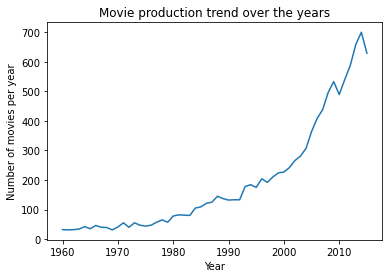

In [29]:
# Number of movies produced each year
movies_per_year= df['release_year'].value_counts().sort_index();
plt.plot(movies_per_year);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies per year');

>Movie production has increased over the years from 1960 to 2015. The decade of 2000 - 2010 shows a steep increase in production compared to previous decades. The year 2014 with 700 movies, is the year of maximum movie production, and 1961 with 31 movies has been the year of least production




#### Research Question 2: Average Runtime Of Movies From Year To Year?

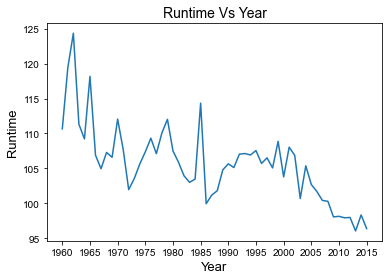

In [30]:
#we will use groupby 
df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

>As we can see the run time is decreasing from year to year

### Research Question 3: What are the top 20 highest grossing movies?


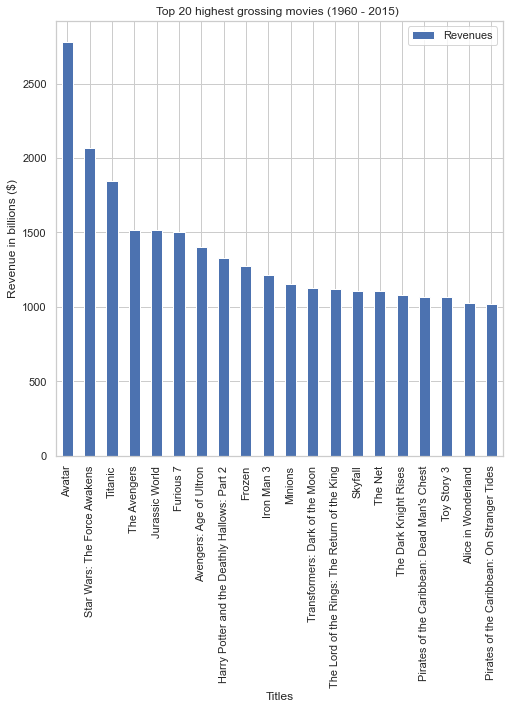

In [32]:
# we will sort the revenue first 
sorted_revenue = df['revenue_in_millions'].sort_values(ascending=False)[:20]
#will loop over the sorted list to make the visal
high_grossers=pd.DataFrame()
titles=[]
revenues=[]
for i in sorted_revenue.index:
    titles.append(df.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])
high_grossers['Titles']=titles
high_grossers['Revenues']=revenues
high_grossers.set_index('Titles',inplace=True)
high_grossers.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 highest grossing movies (1960 - 2015) ');
plt.ylabel('Revenue in billions ($)');



### Research Question 4: Which Movie with Highest Budget? 

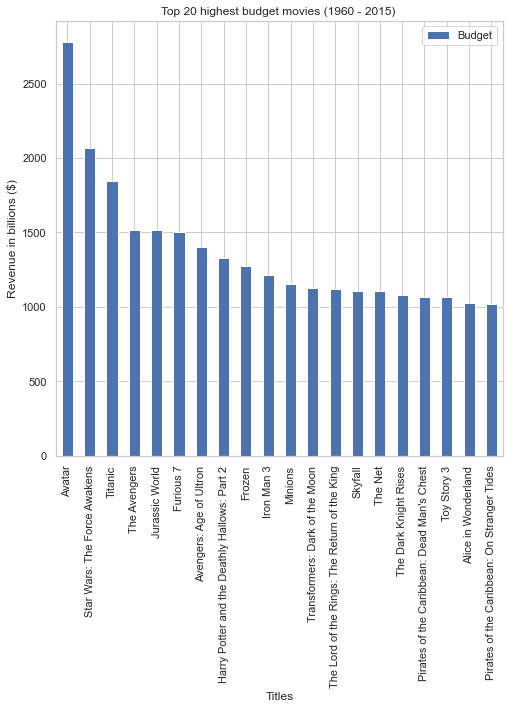

In [33]:
#we will sort the budget and get the top 20 
sorted_budget = df['budget_in_millions'].sort_values(ascending=False)[:20]

# loop over the dataframe 
high_grossers=pd.DataFrame()
titles=[]
revenues=[]
for i in sorted_revenue.index:
    titles.append(df.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])
high_grossers['Titles']=titles
high_grossers['Budget']=revenues
high_grossers.set_index('Titles',inplace=True)
high_grossers.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 highest budget movies (1960 - 2015) ');
plt.ylabel('Revenue in billions ($)');



####  Research Question 5: What is the Average Budget vs Average Revenue of Movies by Year? Do high budgets mean high revenues?

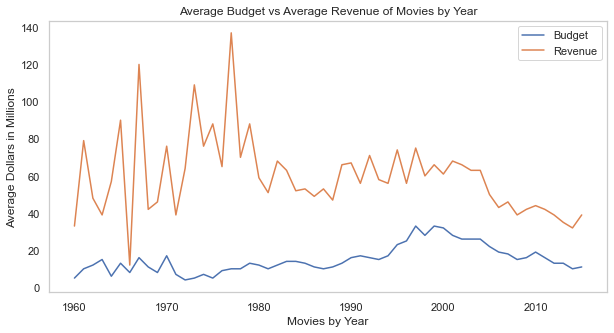

In [35]:
# will use the groupby to between release_year and the revenue 
revenue_by_year_adj = df.groupby('release_year', as_index=False)['revenue_adj_in_millions'].mean().astype(np.int64)
budget_by_year_adj = df.groupby('release_year', as_index=False)['budget_adj_in_millions'].mean().astype(np.int32)

# will use the groupby to between release_year and the budget

plt.plot(budget_by_year_adj['release_year'],budget_by_year_adj['budget_adj_in_millions'], label = 'Budget')
plt.plot(revenue_by_year_adj['release_year'],revenue_by_year_adj['revenue_adj_in_millions'], label = 'Revenue')

plt.xlabel('Movies by Year')
plt.ylabel('Average Dollars in Millions')
plt.title('Average Budget vs Average Revenue of Movies by Year')
plt.grid()
plt.legend(loc = 'upper right');

#### Research Question 6: Most Active Directors Revenue Contribution ?

In [36]:
#Determine how much revenue each of these top 10 directors' films brought in 
#(as a sum for each director) in millions
most_active_directors=df.director.value_counts().head(10)
director_revenue_totals = np.zeros(len(most_active_directors))
i = 0
for director in most_active_directors.index:
    current_director = df['director'].str.contains(director).fillna(False)
    director_film_revenue = df[current_director].xs('revenue_in_millions', axis=1).sum()
    director_revenue_totals[i] = director_film_revenue
    i += 1
    print(director, director_film_revenue)



Woody Allen 1807.8699838444547
Clint Eastwood 3143.4864236148182
Martin Scorsese 2484.9949679990796
Steven Spielberg 9127.668483153706
Ridley Scott 3689.8233760768526
Steven Soderbergh 2398.343042461114
Ron Howard 3643.779431307409
Joel Schumacher 1724.4910113842614
Brian De Palma 1224.2516503842617
Barry Levinson 1373.8084033842613


In [38]:
# see the actors with the related revenue
director_revenue_totals_df = pd.DataFrame(director_revenue_totals, index=most_active_directors.index, columns=['revenue_in_millions'])
director_revenue_totals_df

,revenue_in_millions
Woody Allen,1807.869984
Clint Eastwood,3143.486424
Martin Scorsese,2484.994968
Steven Spielberg,9127.668483
Ridley Scott,3689.823376
Steven Soderbergh,2398.343042
Ron Howard,3643.779431
Joel Schumacher,1724.491011
Brian De Palma,1224.251650
Barry Levinson,1373.808403


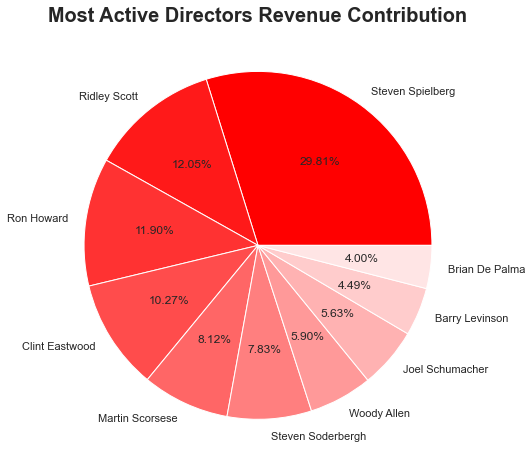

In [39]:
#Taking the sum of the revenue of the films made by the top 10 directors, which contributed the most?

explode = np.linspace(0, 0.5, 10)
colors = ['#ff0000', '#ff1919','#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', '#ffb2b2', '#ffcccc', '#ffe5e5', ]
director_revenue_totals_df.sort_values(by='revenue_in_millions', ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=None )
plt.ylabel('')
plt.title('Most Active Directors Revenue Contribution', weight='bold', fontsize=20);

#### Research Question 7: Which Genre Has The Highest Release Of Movies?

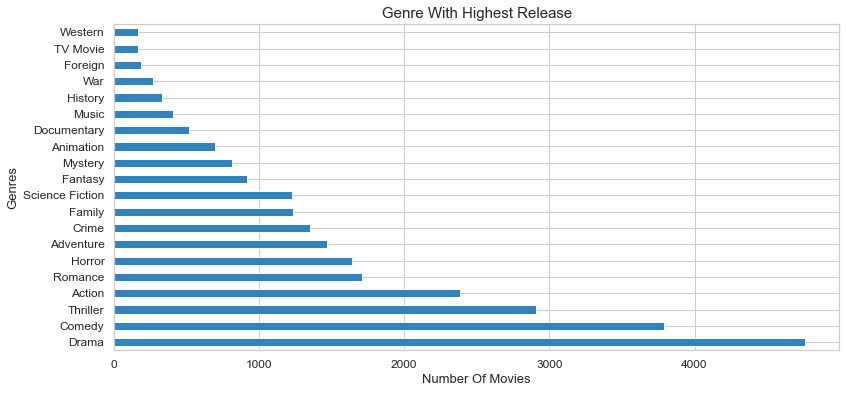

In [40]:

#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")



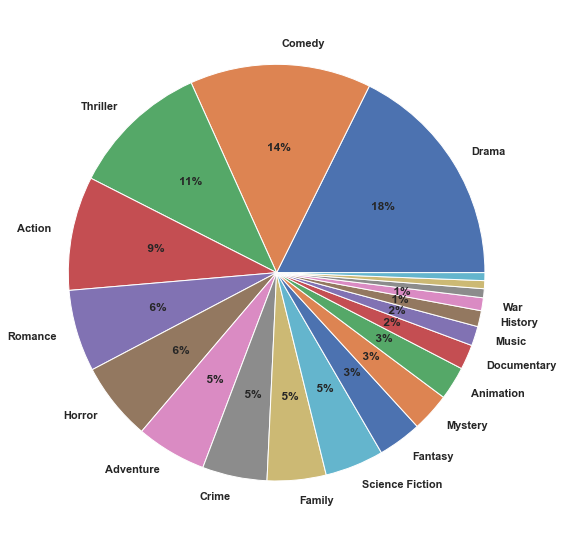

In [41]:
# we will loop over the cloumn of the genre and add it to a list.
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(8, 8))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()



#### Reasearch Question 8: Most Frequent Actor?

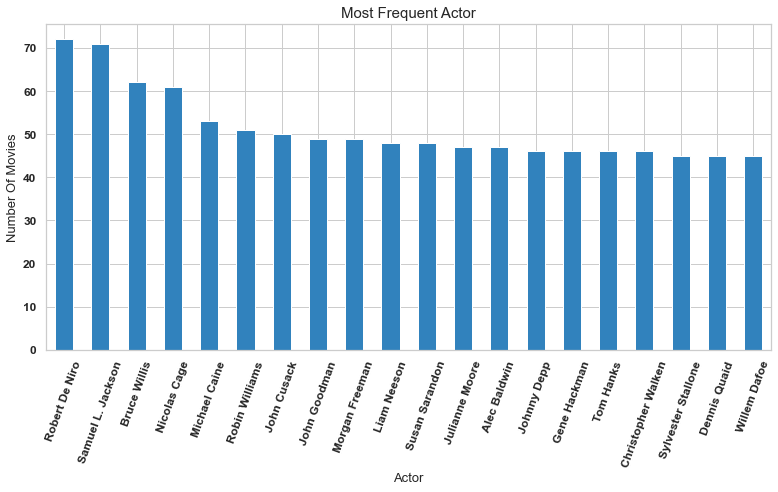

In [42]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_flims = count_genre('cast')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")



#### Reasearch Question 9: Top 20 Director Who Directs Maximum Movies?

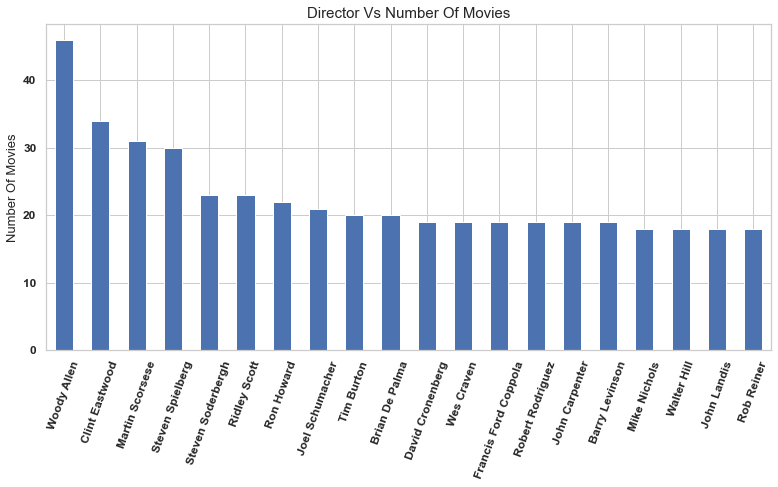

In [43]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies directed by each diretor.
count_director_movies = count_genre('director')

#plot a barh graph
count_director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

#### Reasearch Question 10: Top 20 Production Companies With Higher Number Of Release?


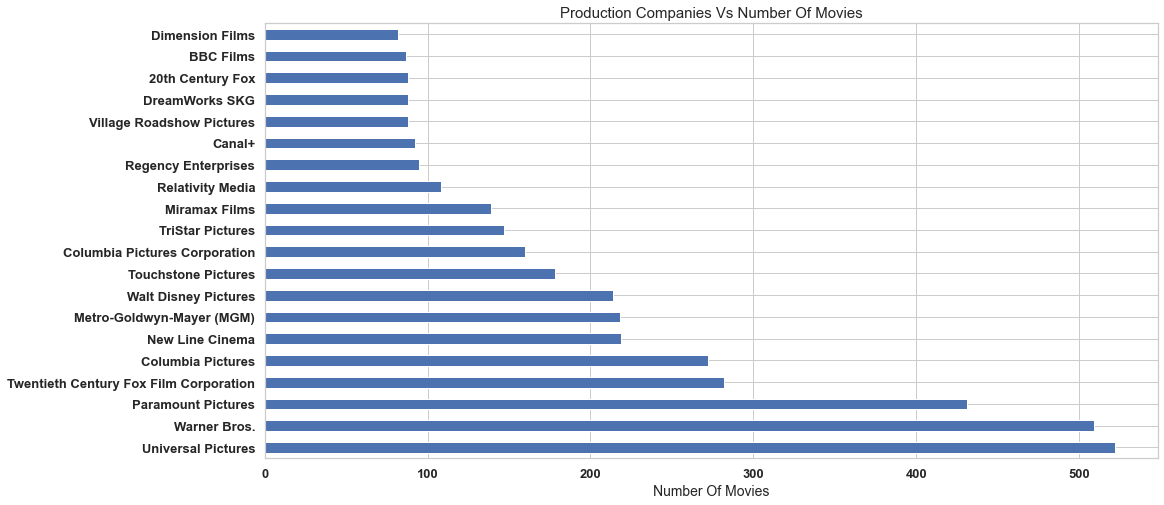

In [44]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies released by each production company.
production_companies = count_genre('production_companies')

#plot he barh plot.
production_companies.iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")

#### Research Question 11: Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?

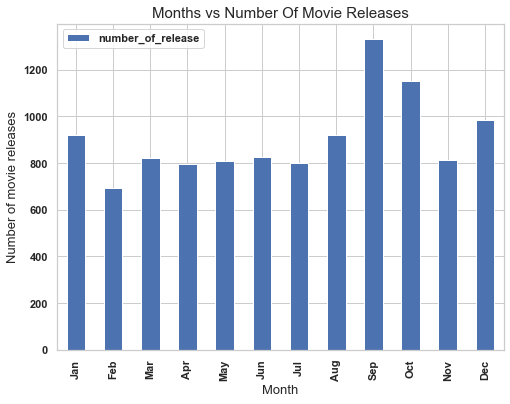

In [45]:
#extract the month number from the release date.
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
month_release = df['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

#### According to the plot we can conclude that there are higher number of release in september and october month.

#### Research Question 12: Which Month Made The Highest Revenue?

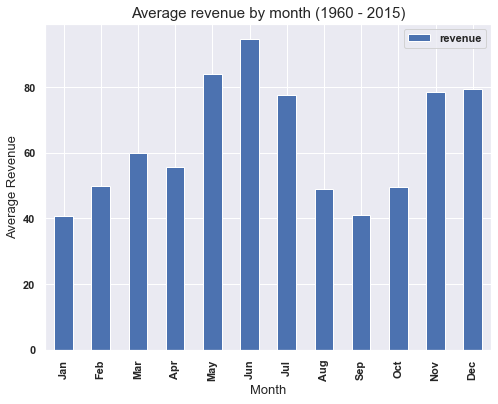

In [46]:
#which month made the highest average revenue?.
#make a dataframe with in which store the release month of each movie.
month_release = pd.DataFrame(month_release)

#change the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

#add a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = df['revenue_in_millions']

#make the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

#### According to the plot we can say that movie which release in may or june month made the high revenue in comparison of other month release. Or it can be happened because of outliers.

## Limitations

>It is not 100% guaranteed that all the insights drawn here are absolutely correct. There may exist many other factors to be taken care of.

> The dataset contained many zero values for information we would expect to see actual values
  - When all zero values were replaced with the mean we were can not assume that the results is 100 % correct

>The Genres column may have contained mutlipe values for each movie.
  - All genre values were captured in the analysis therefore movies were counted multiple times when determing percentages of genres produced



<a id='conclusions'></a>
## Conclusions

   ######          - Drama is the most popular genre, following by action, comedy and thriller.
   ######          - Drame, Comedy, Thriller and Action are four most-made genres.
   ######          - Maximum Number Of Movies Release In Month of Sep and Oct.
   ######          - 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
   ######          - Average runtime of the movies are decreasing year by year.
   ######          - May,june,november and december are most popular month for releasing movies, if you want to earn more profit.
   ######          - Revenue is directly connected to the budget.
   ######          - Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other production companies.
   ######          - Movies with higher budgets have shown a corresponding increase in the revenues.



### References 

> python.org - Kaggle.com / stackoverflow.com 